# <center>**Space X Falcon 9 First Stage Landing Prediction**</center>

## Exploring and Preparing Data

In this notebook, we will perform Exploratory Data Analysis and Feature Engineering.

In [7]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
df = pd.read_csv('../data/spacexdata.csv')
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,6,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,8,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,10,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,11,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,12,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

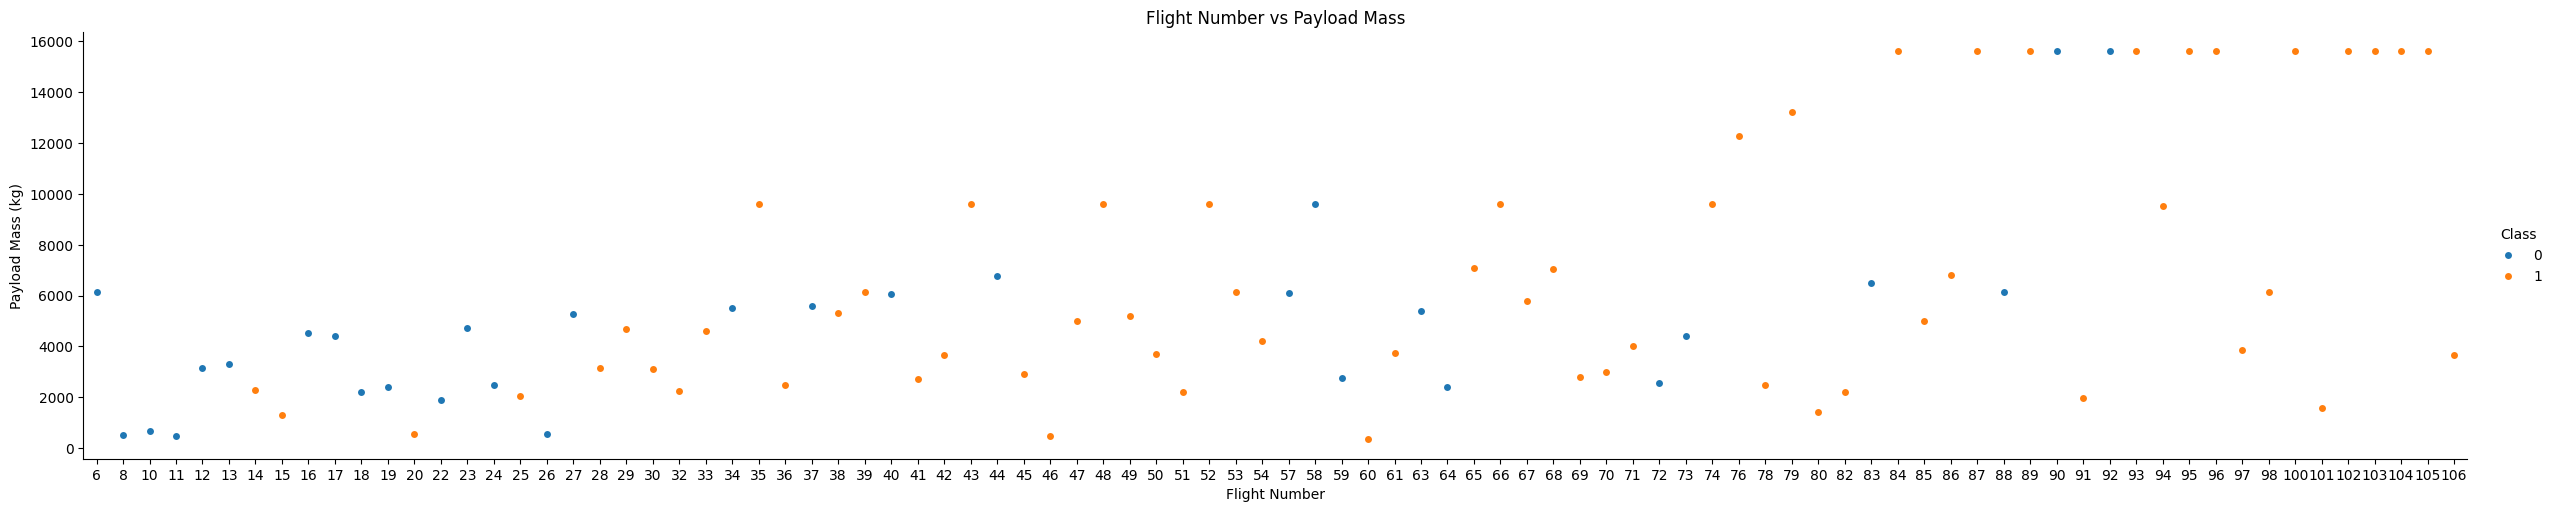

In [21]:
sns.catplot(x='FlightNumber', y='PayloadMass', hue='Class', data=df, aspect=5)
plt.xlabel("Flight Number")
plt.ylabel("Payload Mass (kg)")
plt.title("Flight Number vs Payload Mass")
plt.show()

In [34]:
df.groupby('LaunchSite')['Class'].value_counts().unstack()

Class,0,1
LaunchSite,,
CCSFS SLC 40,22,33
KSC LC 39A,5,17
VAFB SLC 4E,3,10


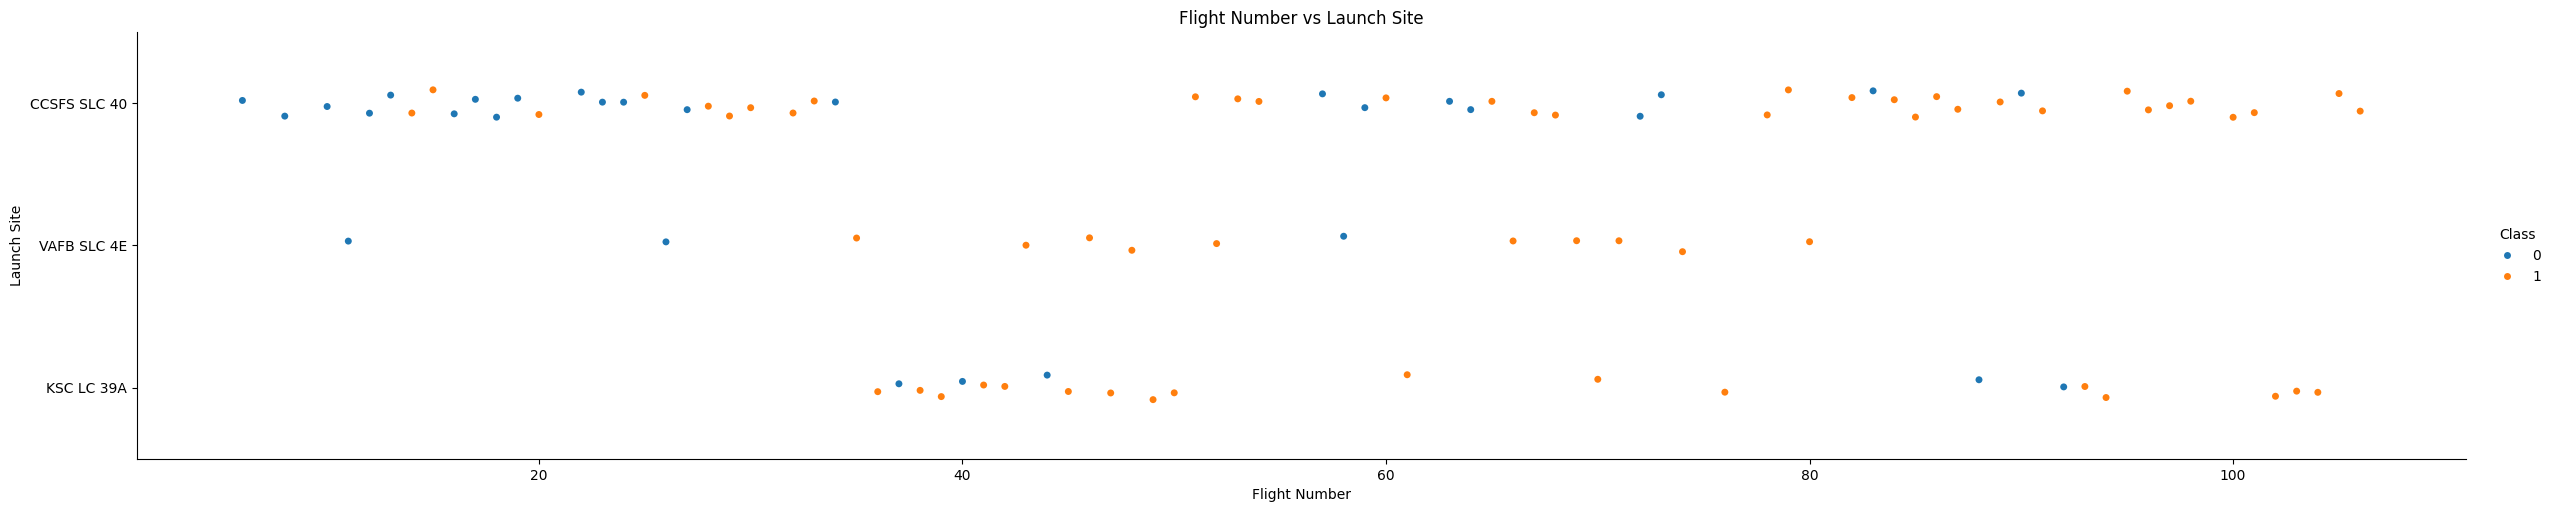

In [22]:
# flight number vs launch site
sns.catplot(x='FlightNumber', y='LaunchSite', hue='Class', data=df, aspect=5)
plt.xlabel("Flight Number")
plt.ylabel("Launch Site")
plt.title("Flight Number vs Launch Site")
plt.show()

The above plot shows the relationship between Flight Number and Launch Site, with the launch outcome (Class) indicated by color.

From the plot, we can observe that:
- As the Flight Number increases (i.e., as SpaceX gains more experience), the proportion of successful launches (Class=1) increases across all launch sites.
- The majority of early launches (lower Flight Numbers) at each site tend to have more failures (Class=0), while later launches are more likely to be successful.
- CCAFS SLC 40 and KSC LC 39A have a higher number of launches compared to VAFB SLC 4E.
- VAFB SLC 4E has fewer launches overall, but also shows an improvement in success rate with higher Flight Numbers.
 
This suggests that experience and possibly improvements in technology or processes over time have contributed to higher launch success rates at all sites.


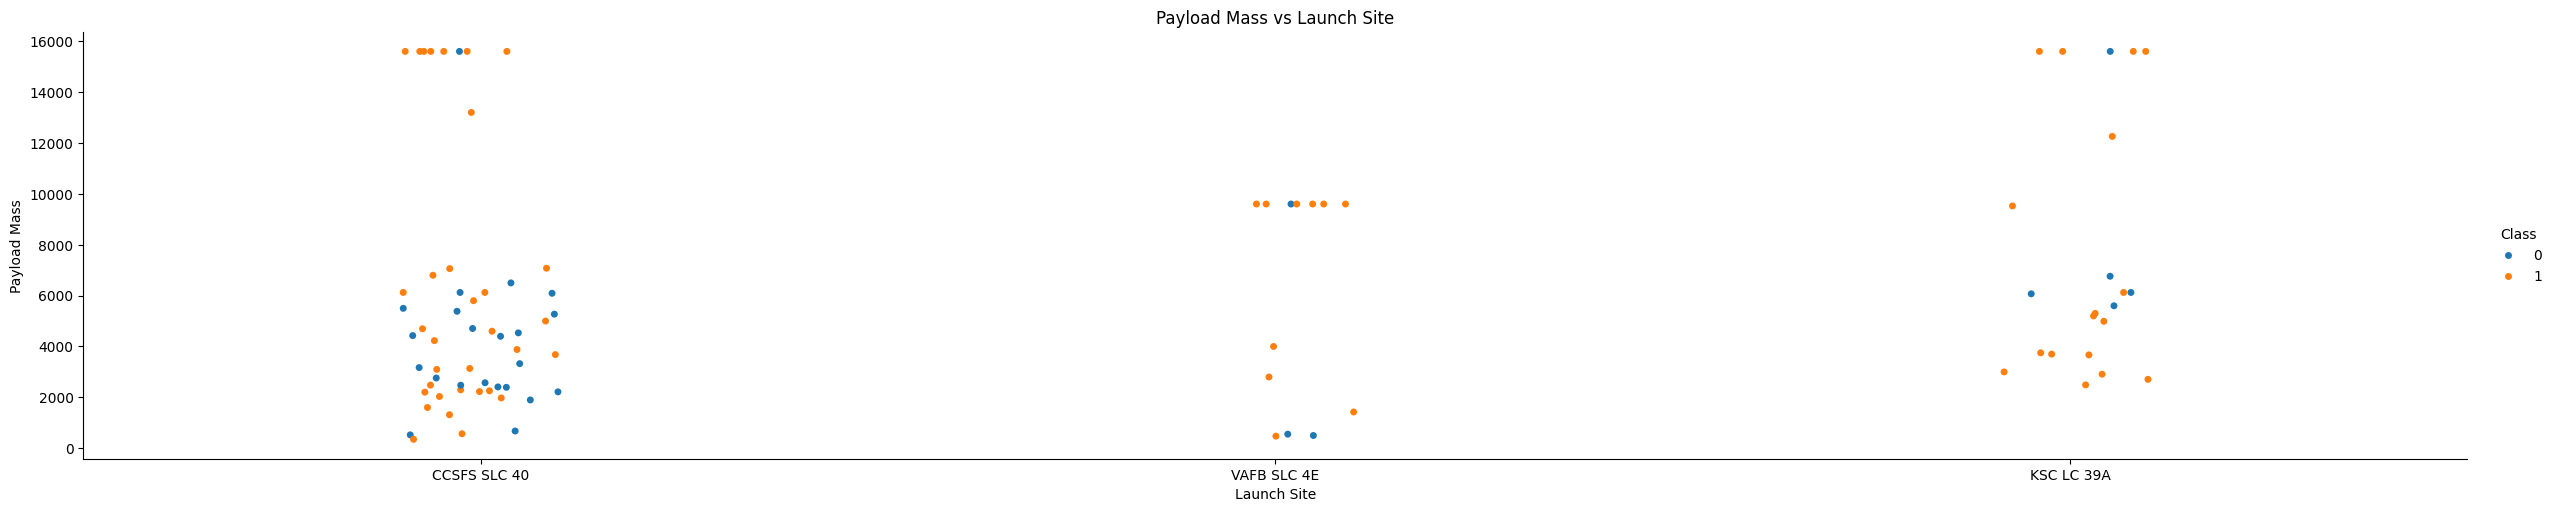

In [35]:
# payload mass vs launch site
sns.catplot(x='LaunchSite', y='PayloadMass', hue='Class', data=df, aspect=5)
plt.xlabel('Launch Site')
plt.ylabel('Payload Mass')
plt.title('Payload Mass vs Launch Site')
plt.show()

The above plot shows the relationship between Payload Mass and Launch Site, with launch outcome (Class) indicated by color.

Observing the plot, we can see:
- CCAFS SLC 40 and KSC LC 39A have a wider range of payload masses compared to VAFB SLC 4E.
- Successful launches (Class=1) occur across the full range of payload masses at all sites, but especially at CCSFS SLC 40 and KSC LC 39A.
- VAFB SLC 4E has fewer launches and generally lower payload masses, but still shows both successes and failures.
- There is no clear pattern that higher payload mass leads to more failures; both successful and failed launches are distributed across the payload mass range.
 
This suggests that launch site and payload mass alone do not determine launch success, and that SpaceX has achieved successful launches with a variety of payload sizes at all sites.


### Visualize the relationship between success rate of each orbit type

In [36]:
df.head(1)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,6,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0


In [37]:
df_grouped_by_orbit = df.groupby('Orbit')['Class'].mean().reset_index(name='mean_class')
df_grouped_by_orbit

,Orbit,mean_class
0,ES-L1,1.000000
1,GEO,1.000000
2,GTO,0.518519
3,HEO,1.000000
4,ISS,0.619048
5,LEO,0.714286
6,MEO,0.666667
7,PO,0.666667
8,SO,0.000000
9,SSO,1.000000


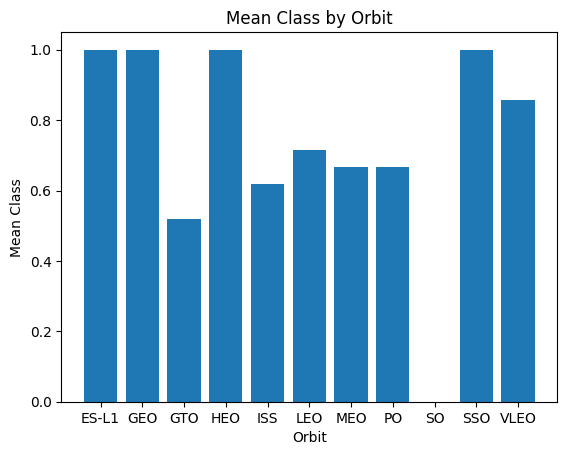

In [38]:
plt.bar(df_grouped_by_orbit['Orbit'], df_grouped_by_orbit['mean_class'])
plt.xlabel('Orbit')
plt.ylabel('Mean Class')
plt.title('Mean Class by Orbit')
plt.show()

The bar plot above shows the mean success rate (mean of the 'Class' column, where 1 indicates success and 0 indicates failure) for each orbit type.
 
Observing the plot, we can see:
- Some orbits, such as GEO, HEO, SSO, and ES-L1, have a mean class of 1.0, indicating a 100% success rate for launches to these orbits.
- Orbits like LEO, ISS, and GTO have lower mean class values, suggesting a mix of successful and failed launches. For example, GTO has a mean class of about 0.52, indicating a success rate just over 50%.
- The SO orbit has a mean class of 0, indicating that all launches to this orbit were unsuccessful.
- VLEO and MEO orbits also show relatively high success rates, but not perfect.
 
In summary, the success rate of launches varies by orbit type, with some orbits consistently achieving successful launches, while others have a more mixed record. This may reflect differences in mission complexity, technical challenges, or operational experience for each orbit type.


### Visualize the relationship between FlightNumber and Orbit type

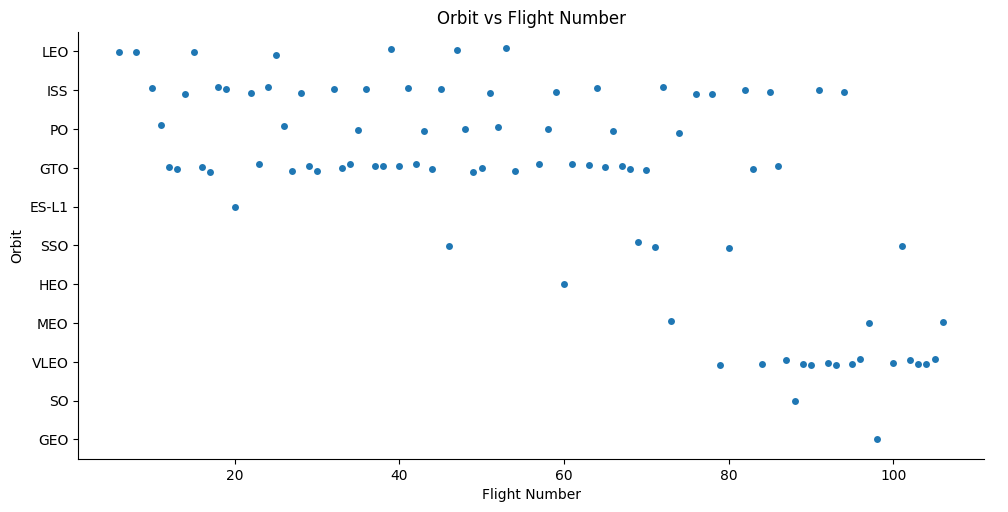

In [57]:
sns.catplot(x='FlightNumber', y='Orbit', data=df, aspect=2)
plt.xlabel('Flight Number')
plt.ylabel('Orbit')
plt.title('Orbit vs Flight Number')
plt.show()

The scatter plot of Orbit vs Flight Number reveals several patterns:
- Early flight numbers (initial launches) are mostly associated with LEO and ISS orbits, indicating that SpaceX initially focused on these lower Earth orbits.
- As the flight numbers increase, launches to a wider variety of orbits (such as GTO, GEO, SSO, HEO, and others) become more frequent, suggesting an expansion in mission diversity over time.
- Some orbits, like VLEO and SO, appear only at higher flight numbers, indicating that these more complex or specialized missions were attempted after SpaceX gained more experience.
- There is a clustering of certain orbits (e.g., LEO, ISS, GTO) across a broad range of flight numbers, reflecting their continued importance throughout the launch history.
- Overall, the plot shows a trend of increasing mission complexity and variety as SpaceX's flight experience grows.


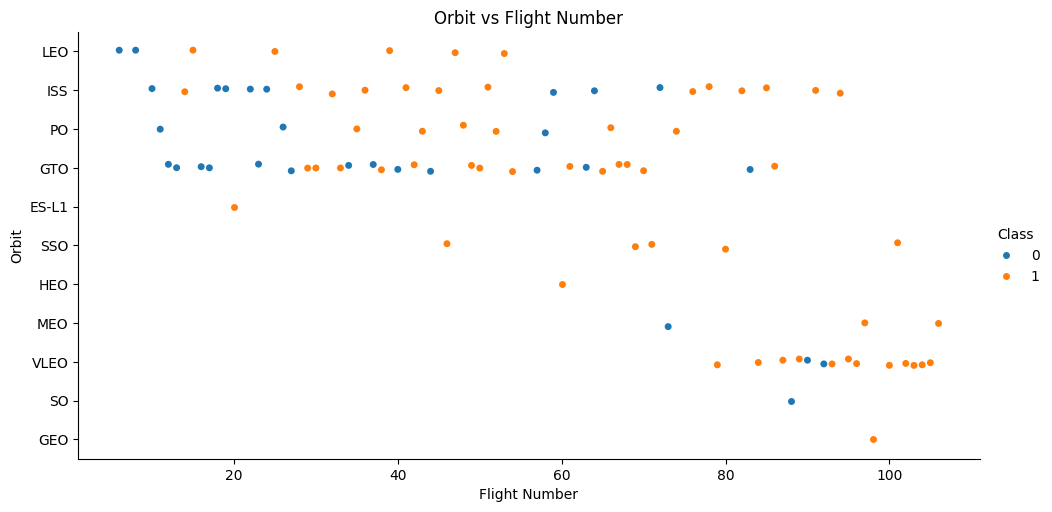

In [58]:
sns.catplot(x='FlightNumber', y='Orbit', hue='Class',data=df, aspect=2)
plt.xlabel('Flight Number')
plt.ylabel('Orbit')
plt.title('Orbit vs Flight Number')
plt.show()

The scatter plot of Orbit vs Flight Number (with success/failure hue) reveals several patterns:
- For early flight numbers, most launches were to LEO and ISS orbits, and these had a mix of successes and failures (as shown by both colors present).
- As flight numbers increase, launches to more diverse orbits (such as GTO, GEO, SSO, HEO, and others) become more common, and the proportion of successful launches (Class=1) increases.
- Some orbits, like GEO, HEO, and SSO, show only successful launches (only one color), indicating a 100% success rate for those orbits.
- GTO and ISS orbits have both successes and failures throughout the flight history, suggesting these missions are more challenging or have more variability.
- VLEO and SO orbits appear only at higher flight numbers, and SO shows only failures (Class=0), while VLEO has mostly successes.

Overall, the plot shows that as SpaceX gained experience (higher flight numbers), they attempted a wider variety of orbits and achieved higher success rates, especially for more complex missions.


### Visualize the relationship between Payload Mass and Orbit type

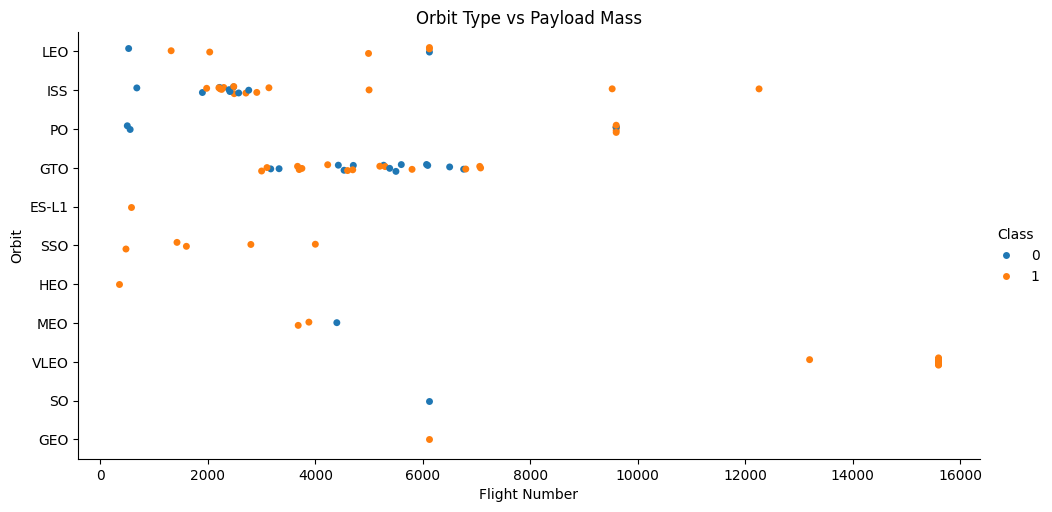

In [61]:
sns.catplot(x='PayloadMass', y='Orbit', hue='Class',data=df, aspect=2)
plt.xlabel('Flight Number')
plt.ylabel('Orbit')
plt.title('Orbit Type vs Payload Mass')
plt.show()

The scatter plot of Payload Mass vs Orbit type reveals several patterns:
- Lower payload masses are mostly associated with LEO and ISS orbits, indicating that missions to these orbits typically require less payload capacity.
- Higher payload masses are more frequently seen in GTO orbits, suggesting that missions to these higher orbits often involve heavier payloads.
- Some orbits, such as GTO and ISS, show a wide range of payload masses, indicating flexibility in mission profiles for these orbits.
- The success rate (Class=1) appears higher for certain orbits (e.g. MEO, SSO) regardless of payload mass, while orbits like GTO and ISS have both successes and failures across a range of payloads.
- There are few or no launches with very high payload mass to LEO and ISS, reflecting the typical mission requirements for these orbits.

Overall, the plot suggests that the type of orbit is a strong factor in determining the payload mass, and that SpaceX has achieved successful launches across a variety of payload masses and orbit types.


### Visualize the launch success yearly trend

In [66]:
# A function to Extract years from the date
year = []
for date in df['Date']:
    year.append(date.split('-')[0])

df.rename(columns={'Date': 'Year'}, inplace=True)
df['Year'] = year
df.head()

,FlightNumber,Year,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,6,2010,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,8,2012,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,10,2013,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,11,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,12,2013,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [72]:
df.groupby('Year')['Class'].value_counts().unstack()

Class,0,1
Year,,
2010,1.0,NaN
2012,1.0,NaN
2013,3.0,NaN
2014,4.0,2.0
2015,4.0,2.0
2016,3.0,5.0
2017,3.0,15.0
2018,7.0,11.0
2019,1.0,9.0


Patterns observed in the yearly launch success trend plot:
- The total number of launches per year has generally increased over time, especially after 2016.
- Early years (2010-2013) had few launches, with most resulting in failure (Class 0).
- From 2014 onwards, the number of successful launches (Class 1) began to surpass failures, indicating improved reliability.
- By 2017 and later, the majority of launches were successful, with failures becoming rare.
- The trend demonstrates SpaceX's increasing launch cadence and significant improvement in launch success rates over the years.

The stacked bar plot visually highlights the shift from more failures to more successes as the years progress.


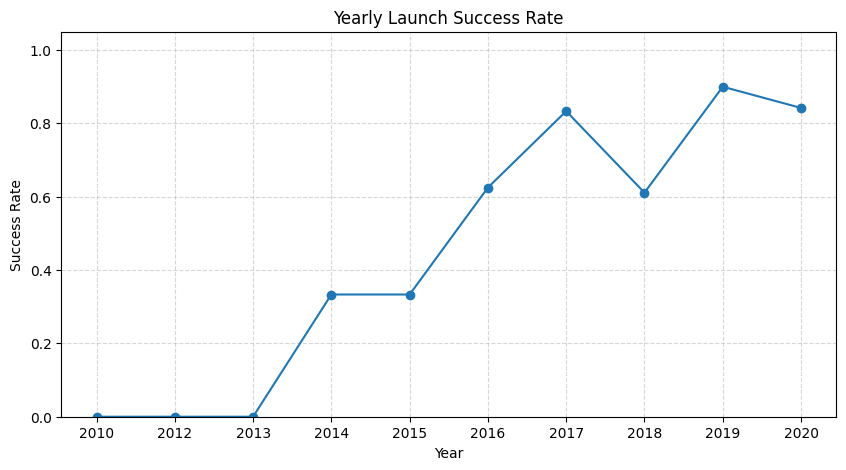

In [84]:
plt.figure(figsize=(10,5))
success_rate = df.groupby('Year')['Class'].mean()

plt.plot(success_rate.index, success_rate.values, marker='o', linestyle='-', color='tab:blue')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.title('Yearly Launch Success Rate')
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


Patterns observed in the yearly launch success rate line plot:
- The success rate was low in the early years (2010-2013), indicating frequent launch failures.
- There is a noticeable upward trend in success rate starting around 2014, with significant improvements each year.
- From 2017 onwards, the success rate remains consistently high, approaching or reaching 1.0 (100% success).
- The plot demonstrates SpaceX's increasing reliability and technical progress over time, with failures becoming rare in recent years.

The overall trend highlights a strong positive correlation between year and launch success rate.


### Feature Engineering

In [85]:
df.columns

Index(['FlightNumber', 'Year', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

In [86]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,6,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,8,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,10,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,11,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,12,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [88]:
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,6,6123.547647,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,8,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,10,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,11,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,12,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [90]:
# convert data to float64 type
features_one_hot.astype('float64')

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,6.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,102.0,15600.000000,2.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,103.0,15600.000000,3.0,1.0,1.0,1.0,5.0,13.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,104.0,15600.000000,6.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,105.0,15600.000000,3.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [91]:
# export to csv
features_one_hot.to_csv('../data/features_one_hot.csv', index=False)